<a href="https://colab.research.google.com/github/shubham-datascience/Custom-conversational-model/blob/main/coursera_honors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py -O setup_google_colab.py
import setup_google_colab

--2020-11-21 06:28:14--  https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1939 (1.9K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   1.89K  --.-KB/s    in 0s      

2020-11-21 06:28:14 (41.1 MB/s) - ‘setup_google_colab.py’ saved [1939/1939]



In [2]:

setup_google_colab.setup_honor()

In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [4]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install compress-pickle

In [6]:
from compress_pickle import load,dump

In [7]:

fname = "/content/drive/My Drive/tokenizer"

In [8]:
tokenizer=load(fname, compression="lzma", set_default_extension=False)

In [9]:

!mkdir -p "/content/drive/My Drive/coursera/data/cornell"

In [10]:
!mkdir -p "/content/drive/My Drive/coursera/data/opensub"

In [11]:
!cd "/content/drive/My Drive/coursera/data/opensub"

In [12]:
!wget -O en.tar.gz http://opus.lingfil.uu.se/download.php?f=OpenSubtitles/en.tar.gz

--2020-11-21 06:29:49--  http://opus.lingfil.uu.se/download.php?f=OpenSubtitles/en.tar.gz
Resolving opus.lingfil.uu.se (opus.lingfil.uu.se)... 130.238.78.148
Connecting to opus.lingfil.uu.se (opus.lingfil.uu.se)|130.238.78.148|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://opus.nlpl.eu/download.php?f=OpenSubtitles/en.tar.gz [following]
--2020-11-21 06:29:49--  http://opus.nlpl.eu/download.php?f=OpenSubtitles/en.tar.gz
Resolving opus.nlpl.eu (opus.nlpl.eu)... 193.166.25.9
Connecting to opus.nlpl.eu (opus.nlpl.eu)|193.166.25.9|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://object.pouta.csc.fi/OPUS-OpenSubtitles/v1/xml/en.zip [following]
--2020-11-21 06:29:50--  https://object.pouta.csc.fi/OPUS-OpenSubtitles/v1/xml/en.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18, 86.50.254.19
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request

In [13]:

!unzip en.tar.gz

Streaming output truncated to the last 5000 lines.
  inflating: OpenSubtitles/xml/en/Adventure/2003/2144_147426_201372_secondhand_lions.xml  
  inflating: OpenSubtitles/xml/en/Adventure/2003/1825_126646_174379_tokyo_godfathers.xml  
  inflating: OpenSubtitles/xml/en/Adventure/2003/2144_61093_78347_secondhand_lions.info  
  inflating: OpenSubtitles/xml/en/Adventure/2003/2144_61093_78347_secondhand_lions.xml  
  inflating: OpenSubtitles/xml/en/Adventure/2003/2144_61043_78289_secondhand_lions.xml  
  inflating: OpenSubtitles/xml/en/Adventure/2003/1864_69243_89778_peter_pan.xml  
  inflating: OpenSubtitles/xml/en/Adventure/2003/2144_147426_201372_secondhand_lions.info  
  inflating: OpenSubtitles/xml/en/Adventure/2003/3084_125320_172655_sinbad_legend_of_the_seven_seas.xml  
  inflating: OpenSubtitles/xml/en/Adventure/2003/745_84434_112858_riverworld.xml  
  inflating: OpenSubtitles/xml/en/Adventure/2003/452_68791_89169_timeline.xml  
  inflating: OpenSubtitles/xml/en/Adventure/2003/4805_12

In [14]:

!rm en.tar.gz

In [15]:
!cd "/content/drive/My Drive/coursera/data/cornell"

In [16]:
!wget https://github.com/Conchylicultor/DeepQA/raw/master/data/cornell/movie_conversations.txt --directory-prefix="/content/drive/My Drive/coursera/data/cornell"

--2020-11-21 06:30:07--  https://github.com/Conchylicultor/DeepQA/raw/master/data/cornell/movie_conversations.txt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Conchylicultor/DeepQA/master/data/cornell/movie_conversations.txt [following]
--2020-11-21 06:30:07--  https://raw.githubusercontent.com/Conchylicultor/DeepQA/master/data/cornell/movie_conversations.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6760930 (6.4M) [text/plain]
Saving to: ‘/content/drive/My Drive/coursera/data/cornell/movie_conversations.txt.1’

movie_conversations 100%[===================>]   6.45M  --.-KB/s    in 0.1s    


In [17]:

!wget https://github.com/Conchylicultor/DeepQA/raw/master/data/cornell/movie_lines.txt --directory-prefix="/content/drive/My Drive/coursera/data/cornell"

--2020-11-21 06:30:07--  https://github.com/Conchylicultor/DeepQA/raw/master/data/cornell/movie_lines.txt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Conchylicultor/DeepQA/master/data/cornell/movie_lines.txt [following]
--2020-11-21 06:30:07--  https://raw.githubusercontent.com/Conchylicultor/DeepQA/master/data/cornell/movie_lines.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34641919 (33M) [text/plain]
Saving to: ‘/content/drive/My Drive/coursera/data/cornell/movie_lines.txt.1’

movie_lines.txt.1   100%[===================>]  33.04M  80.4MB/s    in 0.4s    

2020-11-21 06:30:08 (80.4 MB/s)

In [18]:
import ast
import os
import random
import re
from time import time

import nltk
from tqdm import tqdm

"""
Load the cornell movie dialog corpus.

Available from here:
http://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html

"""

class CornellData:
    """

    """

    def __init__(self, dirName):
        """
        Args:
            dirName (string): directory where to load the corpus
        """
        self.lines = {}
        self.conversations = []

        MOVIE_LINES_FIELDS = ["lineID","characterID","movieID","character","text"]
        MOVIE_CONVERSATIONS_FIELDS = ["character1ID","character2ID","movieID","utteranceIDs"]

        self.lines = self.loadLines(os.path.join(dirName, "movie_lines.txt"), MOVIE_LINES_FIELDS)
        self.conversations = self.loadConversations(os.path.join(dirName, "movie_conversations.txt"), MOVIE_CONVERSATIONS_FIELDS)

        # TODO: Cleaner program (merge copy-paste) !!

    def loadLines(self, fileName, fields):
        """
        Args:
            fileName (str): file to load
            field (set<str>): fields to extract
        Return:
            dict<dict<str>>: the extracted fields for each line
        """
        lines = {}

        with open(fileName, 'r', encoding='iso-8859-1') as f:  # TODO: Solve Iso encoding pb !
            for line in f:
                values = line.split(" +++$+++ ")

                # Extract fields
                lineObj = {}
                for i, field in enumerate(fields):
                    lineObj[field] = values[i]

                lines[lineObj['lineID']] = lineObj

        return lines

    def loadConversations(self, fileName, fields):
        """
        Args:
            fileName (str): file to load
            field (set<str>): fields to extract
        Return:
            list<dict<str>>: the extracted fields for each line
        """
        conversations = []

        with open(fileName, 'r', encoding='iso-8859-1') as f:  # TODO: Solve Iso encoding pb !
            for line in f:
                values = line.split(" +++$+++ ")

                # Extract fields
                convObj = {}
                for i, field in enumerate(fields):
                    convObj[field] = values[i]

                # Convert string to list (convObj["utteranceIDs"] == "['L598485', 'L598486', ...]")
                lineIds = ast.literal_eval(convObj["utteranceIDs"])

                # Reassemble lines
                convObj["lines"] = []
                for lineId in lineIds:
                    convObj["lines"].append(self.lines[lineId])

                conversations.append(convObj)

        return conversations

    def getConversations(self):
        return self.conversations

In [19]:

import xml.etree.ElementTree as ET
import datetime
import os
import sys
import json
import re
import pprint

from gzip import GzipFile

"""
Load the opensubtitles dialog corpus.
"""

class OpensubsData:
    """
    """

    def __init__(self, dirName):
        """
        Args:
            dirName (string): directory where to load the corpus
        """

        # Hack this to filter on subset of Opensubtitles
        # dirName = "%s/en/Action" % dirName

        print("Loading OpenSubtitles conversations in %s." % dirName)
        self.conversations = []
        self.tag_re = re.compile(r'(<!--.*?-->|<[^>]*>)')
        self.conversations = self.loadConversations(dirName)

    def loadConversations(self, dirName):
        """
        Args:
            dirName (str): folder to load
        Return:
            array(question, answer): the extracted QA pairs
        """
        conversations = []
        dirList = self.filesInDir(dirName)
        print(dirList)
        for filepath in tqdm(dirList):
              #print(filepath)
              #if filepath.endswith('gz'):
          try:
            doc = self.getXML(filepath)
            conversations.extend(self.genList(doc))
          except ValueError:
            tqdm.write("Skipping file %s with errors." % filepath)
          except:
            print("Unexpected error:")
                      #raise
        return conversations

    def getConversations(self):
        return self.conversations

    def genList(self, tree):
        root = tree.getroot()

        timeFormat = '%H:%M:%S'
        maxDelta = datetime.timedelta(seconds=1)

        startTime = datetime.datetime.min
        strbuf = ''
        sentList = []

        for child in root:
            for elem in child:
                if elem.tag == 'time':
                    elemID = elem.attrib['id']
                    elemVal = elem.attrib['value'][:-4]
                    if elemID[-1] == 'S':
                        startTime = datetime.datetime.strptime(elemVal, timeFormat)
                    else:
                        sentList.append((strbuf.strip(), startTime, datetime.datetime.strptime(elemVal, timeFormat)))
                        strbuf = ''
                else:
                    try:
                        strbuf = strbuf + " " + elem.text
                    except:
                        pass

        conversations = []
        for idx in range(0, len(sentList) - 1):
            cur = sentList[idx]
            nxt = sentList[idx + 1]
            if nxt[1] - cur[2] <= maxDelta and cur and nxt:
                tmp = {}
                tmp["lines"] = []
                tmp["lines"].append(self.getLine(cur[0]))
                tmp["lines"].append(self.getLine(nxt[0]))
                if self.filter(tmp):
                    conversations.append(tmp)

        return conversations

    def getLine(self, sentence):
        line = {}
        line["text"] = self.tag_re.sub('', sentence).replace('\\\'','\'').strip().lower()
        return line

    def filter(self, lines):
        # Use the followint to customize filtering of QA pairs
        #
        # startwords = ("what", "how", "when", "why", "where", "do", "did", "is", "are", "can", "could", "would", "will")
        # question = lines["lines"][0]["text"]
        # if not question.endswith('?'):
        #     return False
        # if not question.split(' ')[0] in startwords:
        #     return False
        #
        return True

    def getXML(self, filepath):
      fext = os.path.splitext(filepath)[1]
      if fext == '.gz':
          tmp = GzipFile(filename=filepath)
          return ET.parse(tmp)
      else:
          return ET.parse(filepath)

    def filesInDir(self, dirname):
        result = []
        for dirpath, dirs, files in os.walk(dirname):
            for filename in files:
                fname = os.path.join(dirpath, filename)
                result.append(fname)
        return result

def extractText(line, fast_preprocessing=True):
    if fast_preprocessing:
        GOOD_SYMBOLS_RE = re.compile('[^0-9a-z ]')
        REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;#+_]')
        REPLACE_SEVERAL_SPACES = re.compile('\s+')

        line = line.lower()
        line = REPLACE_BY_SPACE_RE.sub(' ', line)
        line = GOOD_SYMBOLS_RE.sub('', line)
        line = REPLACE_SEVERAL_SPACES.sub(' ', line)
        return line.strip()
    else:
        return nltk.word_tokenize(line)


def splitConversations(conversations, max_len=20, fast_preprocessing=True):
    data = []
    for i, conversation in enumerate(tqdm(conversations)):
        lines = conversation['lines']
        for i in range(len(lines) - 1):
            request = extractText(lines[i]['text'])
            reply = extractText(lines[i + 1]['text'])
            if 0 < len(request) <= max_len and 0 < len(reply) <= max_len:
                data += [(request, reply)]
    return data


def readCornellData(path, max_len=20, fast_preprocessing=True):
    dataset = CornellData(path)
    conversations = dataset.getConversations()
    return splitConversations(conversations, max_len=max_len, fast_preprocessing=fast_preprocessing)


def readOpensubsData(path, max_len=20, fast_preprocessing=True):
    dataset = OpensubsData(path)
    conversations = dataset.getConversations()
    return splitConversations(conversations, max_len=max_len, fast_preprocessing=fast_preprocessing)

In [20]:
data_opensub=readOpensubsData("OpenSubtitles")

  0%|          | 4/4634 [00:00<03:14, 23.79it/s]

Loading OpenSubtitles conversations in OpenSubtitles.
['OpenSubtitles/xml/en/Crime/1975/3228_43093_53374_dog_day_afternoon.xml', 'OpenSubtitles/xml/en/Crime/1975/3228_43093_53374_dog_day_afternoon.info', 'OpenSubtitles/xml/en/Crime/1974/1198_147939_202039_the_godfather_part_ii.info', 'OpenSubtitles/xml/en/Crime/1974/1198_147939_202039_the_godfather_part_ii.xml', 'OpenSubtitles/xml/en/Crime/1974/4605_37681_45802_chinatown.xml', 'OpenSubtitles/xml/en/Crime/1974/4605_37681_45802_chinatown.info', 'OpenSubtitles/xml/en/Crime/1999/1898_92588_125113_kaosu.xml', 'OpenSubtitles/xml/en/Crime/1999/1898_92588_125113_kaosu.info', 'OpenSubtitles/xml/en/Crime/1993/6044_61143_78410_kalifornia.info', 'OpenSubtitles/xml/en/Crime/1993/3942_40132_49334_carlitos_way.info', 'OpenSubtitles/xml/en/Crime/1993/6044_61143_78410_kalifornia.xml', 'OpenSubtitles/xml/en/Crime/1993/3942_40132_49334_carlitos_way.xml', 'OpenSubtitles/xml/en/Crime/1979/1761_145109_198481_the_warriors.xml', 'OpenSubtitles/xml/en/Crime/19

  0%|          | 11/4634 [00:00<02:43, 28.31it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  0%|          | 14/4634 [00:00<03:11, 24.15it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  0%|          | 21/4634 [00:00<02:57, 25.95it/s]

Unexpected error:
Unexpected error:
Unexpected error:


  1%|          | 26/4634 [00:00<03:13, 23.86it/s]

Unexpected error:
Unexpected error:
Unexpected error:


  1%|          | 38/4634 [00:01<03:03, 25.06it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  1%|          | 42/4634 [00:01<03:32, 21.60it/s]

Unexpected error:
Unexpected error:
Unexpected error:


  1%|          | 47/4634 [00:01<03:41, 20.73it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  1%|          | 57/4634 [00:02<04:03, 18.78it/s]

Unexpected error:


  1%|▏         | 61/4634 [00:02<03:31, 21.63it/s]

Unexpected error:
Unexpected error:
Unexpected error:


  1%|▏         | 68/4634 [00:02<03:23, 22.49it/s]

Unexpected error:
Unexpected error:


  2%|▏         | 71/4634 [00:03<03:52, 19.60it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  2%|▏         | 80/4634 [00:03<03:05, 24.53it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  2%|▏         | 84/4634 [00:03<03:17, 23.03it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  2%|▏         | 94/4634 [00:03<02:55, 25.81it/s]

Unexpected error:
Unexpected error:


  2%|▏         | 97/4634 [00:04<03:47, 19.98it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  2%|▏         | 109/4634 [00:04<02:54, 25.92it/s]

Unexpected error:
Unexpected error:


  3%|▎         | 118/4634 [00:04<03:25, 21.95it/s]

Unexpected error:
Unexpected error:
Unexpected error:


  3%|▎         | 127/4634 [00:05<03:00, 24.98it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  3%|▎         | 135/4634 [00:05<02:26, 30.68it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  3%|▎         | 140/4634 [00:05<02:57, 25.29it/s]

Unexpected error:
Unexpected error:


  3%|▎         | 147/4634 [00:05<03:02, 24.60it/s]

Unexpected error:
Unexpected error:


  3%|▎         | 150/4634 [00:06<03:57, 18.92it/s]

Unexpected error:
Unexpected error:


  3%|▎         | 157/4634 [00:06<03:55, 19.04it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  4%|▎         | 165/4634 [00:06<03:16, 22.70it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  4%|▎         | 170/4634 [00:07<03:10, 23.47it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  4%|▍         | 184/4634 [00:07<02:38, 28.08it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  4%|▍         | 191/4634 [00:07<03:00, 24.67it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  4%|▍         | 200/4634 [00:08<02:49, 26.22it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  5%|▍         | 212/4634 [00:08<02:34, 28.70it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  5%|▍         | 223/4634 [00:08<02:28, 29.73it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  5%|▌         | 235/4634 [00:09<02:18, 31.86it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  5%|▌         | 240/4634 [00:09<02:52, 25.41it/s]

Unexpected error:
Unexpected error:
Unexpected error:


  5%|▌         | 250/4634 [00:09<02:59, 24.45it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  6%|▌         | 261/4634 [00:10<02:35, 28.07it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  6%|▌         | 270/4634 [00:10<02:39, 27.44it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  6%|▌         | 274/4634 [00:10<03:13, 22.54it/s]

Unexpected error:
Unexpected error:
Unexpected error:


  6%|▌         | 283/4634 [00:11<03:09, 22.94it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  6%|▋         | 299/4634 [00:11<02:21, 30.55it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  7%|▋         | 320/4634 [00:12<01:53, 38.16it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  7%|▋         | 331/4634 [00:12<02:01, 35.43it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  7%|▋         | 345/4634 [00:12<02:09, 33.08it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  8%|▊         | 360/4634 [00:13<02:02, 34.88it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  8%|▊         | 371/4634 [00:13<02:16, 31.31it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  8%|▊         | 376/4634 [00:13<02:53, 24.59it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  8%|▊         | 391/4634 [00:14<02:20, 30.17it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  9%|▊         | 402/4634 [00:14<02:23, 29.44it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  9%|▉         | 416/4634 [00:15<02:04, 33.86it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


  9%|▉         | 430/4634 [00:15<02:09, 32.45it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 10%|▉         | 445/4634 [00:15<01:59, 34.99it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 10%|▉         | 460/4634 [00:16<02:00, 34.65it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 10%|█         | 471/4634 [00:16<02:17, 30.21it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 10%|█         | 482/4634 [00:17<02:26, 28.28it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 11%|█         | 493/4634 [00:17<02:29, 27.72it/s]

Unexpected error:
Unexpected error:


 11%|█         | 500/4634 [00:18<03:31, 19.54it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 11%|█         | 514/4634 [00:18<02:53, 23.75it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 11%|█▏        | 528/4634 [00:19<02:56, 23.23it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 12%|█▏        | 534/4634 [00:19<02:25, 28.19it/s]

Unexpected error:


 12%|█▏        | 543/4634 [00:19<02:44, 24.94it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 12%|█▏        | 553/4634 [00:20<03:10, 21.46it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 12%|█▏        | 560/4634 [00:20<03:24, 19.94it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 12%|█▏        | 566/4634 [00:21<04:21, 15.58it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 12%|█▏        | 579/4634 [00:21<03:08, 21.48it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 13%|█▎        | 592/4634 [00:22<02:49, 23.89it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 13%|█▎        | 607/4634 [00:22<02:33, 26.24it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 13%|█▎        | 615/4634 [00:22<02:03, 32.54it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 13%|█▎        | 624/4634 [00:23<02:34, 26.01it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 14%|█▍        | 642/4634 [00:23<02:32, 26.16it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Skipping file OpenSubtitles/xml/en/Comedy/2003/529_124078_171007_how_to_lose_a_guy_in_10_days.xml with errors.
Unexpected error:


 14%|█▍        | 653/4634 [00:24<02:33, 25.98it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 14%|█▍        | 659/4634 [00:24<02:11, 30.20it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 14%|█▍        | 670/4634 [00:24<02:22, 27.87it/s]

Unexpected error:
Unexpected error:


 15%|█▍        | 678/4634 [00:25<03:08, 21.02it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 15%|█▍        | 684/4634 [00:25<02:36, 25.29it/s]

Unexpected error:


 15%|█▍        | 691/4634 [00:26<03:24, 19.27it/s]

Unexpected error:
Unexpected error:


 15%|█▌        | 700/4634 [00:26<03:55, 16.73it/s]

Unexpected error:
Unexpected error:


 15%|█▌        | 708/4634 [00:27<04:04, 16.06it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 16%|█▌        | 727/4634 [00:28<03:13, 20.21it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 16%|█▌        | 737/4634 [00:28<02:59, 21.67it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 16%|█▌        | 746/4634 [00:28<02:22, 27.33it/s]

Unexpected error:
Unexpected error:


 16%|█▋        | 755/4634 [00:29<02:59, 21.65it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 17%|█▋        | 771/4634 [00:29<02:35, 24.80it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 17%|█▋        | 775/4634 [00:29<02:22, 27.05it/s]

Unexpected error:
Unexpected error:


 17%|█▋        | 785/4634 [00:30<02:49, 22.69it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 17%|█▋        | 790/4634 [00:30<02:32, 25.18it/s]

Unexpected error:


 17%|█▋        | 803/4634 [00:31<02:45, 23.13it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 18%|█▊        | 817/4634 [00:31<03:16, 19.44it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 18%|█▊        | 823/4634 [00:31<02:46, 22.87it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 18%|█▊        | 833/4634 [00:32<03:00, 21.11it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 18%|█▊        | 840/4634 [00:32<03:42, 17.02it/s]

Unexpected error:
Unexpected error:


 18%|█▊        | 846/4634 [00:33<02:59, 21.11it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 18%|█▊        | 857/4634 [00:33<03:17, 19.10it/s]

Unexpected error:
Unexpected error:


 19%|█▊        | 866/4634 [00:34<03:29, 18.00it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 19%|█▉        | 881/4634 [00:34<03:17, 18.98it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 19%|█▉        | 892/4634 [00:35<03:11, 19.56it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 19%|█▉        | 900/4634 [00:35<02:33, 24.37it/s]

Unexpected error:


 20%|█▉        | 910/4634 [00:36<02:53, 21.44it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 20%|█▉        | 916/4634 [00:36<02:25, 25.48it/s]

Unexpected error:


 20%|█▉        | 924/4634 [00:36<03:11, 19.40it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 20%|██        | 933/4634 [00:37<02:24, 25.67it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 20%|██        | 942/4634 [00:37<03:03, 20.15it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 20%|██        | 946/4634 [00:37<02:41, 22.84it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 21%|██        | 954/4634 [00:38<03:29, 17.53it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 21%|██        | 958/4634 [00:38<03:04, 19.95it/s]

Unexpected error:


 21%|██        | 967/4634 [00:39<03:37, 16.87it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 21%|██        | 982/4634 [00:39<02:33, 23.82it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 21%|██▏       | 988/4634 [00:39<03:10, 19.15it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 21%|██▏       | 992/4634 [00:39<03:03, 19.81it/s]

Unexpected error:
Unexpected error:


 22%|██▏       | 1010/4634 [00:40<02:44, 22.00it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 22%|██▏       | 1026/4634 [00:41<02:32, 23.63it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 22%|██▏       | 1034/4634 [00:42<03:38, 16.49it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 22%|██▏       | 1038/4634 [00:42<03:16, 18.26it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 23%|██▎       | 1048/4634 [00:43<03:37, 16.50it/s]

Unexpected error:
Unexpected error:


 23%|██▎       | 1052/4634 [00:43<03:07, 19.14it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 23%|██▎       | 1077/4634 [00:43<02:19, 25.52it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 24%|██▎       | 1092/4634 [00:44<02:15, 26.21it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 24%|██▎       | 1096/4634 [00:44<02:05, 28.22it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 24%|██▍       | 1110/4634 [00:45<02:19, 25.32it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Skipping file OpenSubtitles/xml/en/Comedy/2004/2480_226704_299940_little_black_book.xml with errors.
Unexpected error:


 24%|██▍       | 1122/4634 [00:45<01:50, 31.90it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 24%|██▍       | 1133/4634 [00:46<02:25, 24.00it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 25%|██▍       | 1137/4634 [00:46<02:08, 27.17it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 25%|██▍       | 1146/4634 [00:47<03:13, 17.98it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 25%|██▍       | 1155/4634 [00:47<02:31, 22.97it/s]

Unexpected error:


 25%|██▌       | 1163/4634 [00:47<03:10, 18.18it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 25%|██▌       | 1173/4634 [00:48<02:17, 25.24it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 26%|██▌       | 1185/4634 [00:48<03:03, 18.82it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 26%|██▌       | 1196/4634 [00:49<02:13, 25.71it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 26%|██▌       | 1204/4634 [00:49<03:03, 18.73it/s]

Unexpected error:
Unexpected error:


 26%|██▌       | 1214/4634 [00:50<02:09, 26.35it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 26%|██▋       | 1218/4634 [00:50<01:57, 29.09it/s]

Unexpected error:


 26%|██▋       | 1225/4634 [00:50<03:12, 17.75it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 27%|██▋       | 1230/4634 [00:50<02:35, 21.83it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 27%|██▋       | 1242/4634 [00:51<02:48, 20.09it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 27%|██▋       | 1253/4634 [00:51<01:59, 28.20it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 27%|██▋       | 1264/4634 [00:52<02:38, 21.20it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 28%|██▊       | 1277/4634 [00:52<01:52, 29.89it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 28%|██▊       | 1286/4634 [00:53<02:53, 19.35it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 28%|██▊       | 1298/4634 [00:53<01:58, 28.10it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 28%|██▊       | 1311/4634 [00:54<02:17, 24.15it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 28%|██▊       | 1320/4634 [00:54<02:08, 25.86it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 29%|██▊       | 1331/4634 [00:55<02:53, 19.06it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 29%|██▉       | 1340/4634 [00:55<02:09, 25.35it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 29%|██▉       | 1350/4634 [00:56<02:59, 18.25it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 29%|██▉       | 1361/4634 [00:56<02:08, 25.47it/s]

Unexpected error:
Unexpected error:


 30%|██▉       | 1374/4634 [00:57<02:54, 18.67it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 30%|██▉       | 1386/4634 [00:57<02:07, 25.45it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 30%|███       | 1395/4634 [00:58<02:54, 18.59it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 30%|███       | 1410/4634 [00:58<01:56, 27.74it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 31%|███       | 1425/4634 [00:59<02:29, 21.51it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 31%|███       | 1429/4634 [00:59<02:24, 22.18it/s]

Unexpected error:
Unexpected error:


 31%|███       | 1436/4634 [01:00<03:25, 15.60it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 31%|███       | 1448/4634 [01:00<02:18, 22.98it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 32%|███▏      | 1467/4634 [01:01<01:58, 26.67it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 32%|███▏      | 1475/4634 [01:01<01:51, 28.31it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 32%|███▏      | 1479/4634 [01:01<01:42, 30.67it/s]

Unexpected error:
Unexpected error:


 32%|███▏      | 1487/4634 [01:02<02:59, 17.52it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 32%|███▏      | 1499/4634 [01:02<02:02, 25.64it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 32%|███▏      | 1504/4634 [01:02<01:45, 29.79it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 33%|███▎      | 1522/4634 [01:03<01:51, 28.02it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 33%|███▎      | 1539/4634 [01:03<01:17, 39.71it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 34%|███▎      | 1554/4634 [01:04<01:59, 25.85it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 34%|███▍      | 1566/4634 [01:04<01:31, 33.47it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 34%|███▍      | 1575/4634 [01:05<01:22, 37.22it/s]

Unexpected error:


 34%|███▍      | 1589/4634 [01:05<02:04, 24.52it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 35%|███▍      | 1607/4634 [01:06<01:21, 36.96it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 35%|███▍      | 1614/4634 [01:06<01:15, 39.84it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 35%|███▌      | 1629/4634 [01:06<01:55, 26.01it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 36%|███▌      | 1647/4634 [01:07<01:24, 35.43it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 36%|███▌      | 1655/4634 [01:07<01:11, 41.63it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 36%|███▌      | 1662/4634 [01:08<02:21, 21.06it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 36%|███▌      | 1674/4634 [01:08<01:37, 30.28it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 36%|███▋      | 1684/4634 [01:08<01:21, 36.13it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 37%|███▋      | 1707/4634 [01:09<01:26, 34.01it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 37%|███▋      | 1716/4634 [01:09<01:09, 41.75it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 37%|███▋      | 1723/4634 [01:09<01:10, 41.57it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 38%|███▊      | 1743/4634 [01:10<01:25, 33.73it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 38%|███▊      | 1760/4634 [01:10<01:03, 45.47it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 38%|███▊      | 1767/4634 [01:10<00:59, 48.14it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 39%|███▊      | 1789/4634 [01:11<01:26, 32.80it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 39%|███▉      | 1801/4634 [01:12<01:26, 32.63it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 39%|███▉      | 1810/4634 [01:12<02:35, 18.18it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 39%|███▉      | 1824/4634 [01:13<01:41, 27.72it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 40%|███▉      | 1841/4634 [01:13<01:08, 40.69it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 40%|████      | 1857/4634 [01:14<01:35, 29.02it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 40%|████      | 1874/4634 [01:14<01:09, 39.87it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 41%|████      | 1880/4634 [01:14<01:06, 41.44it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 41%|████      | 1894/4634 [01:15<01:36, 28.38it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 41%|████▏     | 1913/4634 [01:15<01:06, 40.90it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 42%|████▏     | 1933/4634 [01:15<00:47, 56.37it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 42%|████▏     | 1953/4634 [01:16<01:14, 35.98it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 43%|████▎     | 1981/4634 [01:16<00:48, 55.01it/s]

Skipping file OpenSubtitles/xml/en/Action/2003/602_152466_207871_batoru_rowaiaru_ii_rekuiemu.xml with errors.
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 43%|████▎     | 1992/4634 [01:16<00:45, 58.10it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 43%|████▎     | 2009/4634 [01:17<01:19, 33.13it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 44%|████▎     | 2023/4634 [01:18<00:58, 44.94it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 44%|████▍     | 2037/4634 [01:18<00:53, 48.96it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 44%|████▍     | 2054/4634 [01:19<01:28, 29.14it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 45%|████▍     | 2076/4634 [01:19<01:03, 40.55it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 45%|████▍     | 2083/4634 [01:19<01:01, 41.60it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 45%|████▌     | 2095/4634 [01:20<01:41, 25.05it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 46%|████▌     | 2121/4634 [01:20<00:58, 43.03it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 46%|████▌     | 2128/4634 [01:20<01:02, 40.26it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 46%|████▌     | 2143/4634 [01:21<01:39, 25.06it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 47%|████▋     | 2158/4634 [01:21<01:06, 37.00it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 47%|████▋     | 2170/4634 [01:22<01:05, 37.43it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 47%|████▋     | 2179/4634 [01:23<02:08, 19.17it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 47%|████▋     | 2201/4634 [01:23<01:10, 34.70it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 48%|████▊     | 2217/4634 [01:23<00:54, 44.58it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 48%|████▊     | 2231/4634 [01:24<01:33, 25.72it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 48%|████▊     | 2247/4634 [01:24<01:01, 38.94it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 49%|████▉     | 2260/4634 [01:24<00:54, 43.58it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 49%|████▉     | 2284/4634 [01:25<01:27, 26.83it/s]

Skipping file OpenSubtitles/xml/en/Action/2004/59_84873_113518_appurushdo.xml with errors.
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 50%|████▉     | 2299/4634 [01:26<01:02, 37.47it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 50%|████▉     | 2312/4634 [01:26<00:56, 40.83it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 50%|█████     | 2334/4634 [01:27<01:35, 24.18it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 51%|█████     | 2348/4634 [01:27<01:08, 33.13it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 51%|█████     | 2366/4634 [01:27<00:48, 46.69it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 51%|█████▏    | 2386/4634 [01:28<01:14, 30.06it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 52%|█████▏    | 2401/4634 [01:28<00:55, 40.39it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 52%|█████▏    | 2424/4634 [01:29<00:39, 55.76it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 52%|█████▏    | 2432/4634 [01:29<00:40, 54.66it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 53%|█████▎    | 2445/4634 [01:30<01:23, 26.08it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 53%|█████▎    | 2451/4634 [01:30<01:16, 28.39it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 53%|█████▎    | 2466/4634 [01:30<00:56, 38.17it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 54%|█████▍    | 2497/4634 [01:31<01:17, 27.42it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 54%|█████▍    | 2503/4634 [01:31<01:10, 30.18it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 54%|█████▍    | 2518/4634 [01:32<02:03, 17.12it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 55%|█████▍    | 2531/4634 [01:33<01:20, 26.15it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 55%|█████▍    | 2545/4634 [01:33<01:00, 34.55it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 55%|█████▌    | 2552/4634 [01:33<00:51, 40.63it/s]

Unexpected error:
Unexpected error:


 56%|█████▌    | 2572/4634 [01:34<01:26, 23.75it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 56%|█████▌    | 2590/4634 [01:34<00:58, 35.24it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 56%|█████▋    | 2607/4634 [01:34<00:42, 47.78it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 56%|█████▋    | 2615/4634 [01:35<00:38, 52.04it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 57%|█████▋    | 2629/4634 [01:35<01:08, 29.43it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 57%|█████▋    | 2658/4634 [01:36<00:39, 49.53it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 58%|█████▊    | 2671/4634 [01:36<00:33, 58.30it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 58%|█████▊    | 2679/4634 [01:36<00:33, 57.84it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 58%|█████▊    | 2702/4634 [01:37<00:56, 34.27it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 58%|█████▊    | 2709/4634 [01:37<00:52, 37.02it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 59%|█████▉    | 2727/4634 [01:37<00:38, 49.58it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 59%|█████▉    | 2735/4634 [01:38<00:34, 54.76it/s]

Unexpected error:
Unexpected error:


 59%|█████▉    | 2749/4634 [01:38<01:09, 26.95it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 60%|█████▉    | 2775/4634 [01:39<00:39, 47.66it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 60%|██████    | 2796/4634 [01:39<00:29, 61.74it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 61%|██████    | 2820/4634 [01:40<00:48, 37.72it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 61%|██████    | 2834/4634 [01:40<00:39, 45.73it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 61%|██████▏   | 2848/4634 [01:41<00:34, 51.42it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 62%|██████▏   | 2857/4634 [01:41<00:32, 54.16it/s]

Unexpected error:
Unexpected error:


 62%|██████▏   | 2871/4634 [01:42<01:07, 26.11it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 62%|██████▏   | 2887/4634 [01:42<00:45, 38.62it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 63%|██████▎   | 2901/4634 [01:42<00:42, 41.20it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 63%|██████▎   | 2914/4634 [01:43<01:20, 21.34it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 63%|██████▎   | 2936/4634 [01:44<00:44, 38.50it/s]

Skipping file OpenSubtitles/xml/en/Family/2001/3935_19508_22105_cats__dogs.xml with errors.
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 63%|██████▎   | 2942/4634 [01:44<00:44, 37.67it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 64%|██████▎   | 2948/4634 [01:44<00:49, 33.82it/s]

Unexpected error:
Unexpected error:


 64%|██████▍   | 2957/4634 [01:45<01:35, 17.62it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 64%|██████▍   | 2970/4634 [01:45<01:03, 26.10it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 65%|██████▍   | 2991/4634 [01:45<00:41, 39.54it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 65%|██████▍   | 2998/4634 [01:45<00:36, 44.22it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 65%|██████▌   | 3014/4634 [01:46<01:04, 25.02it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 65%|██████▌   | 3033/4634 [01:47<00:41, 38.53it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 66%|██████▌   | 3055/4634 [01:47<00:29, 52.78it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 66%|██████▋   | 3071/4634 [01:47<00:25, 60.66it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 67%|██████▋   | 3101/4634 [01:48<00:38, 40.30it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 67%|██████▋   | 3110/4634 [01:48<00:34, 43.64it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Skipping file OpenSubtitles/xml/en/Drama/2003/1723_68784_89159_big_fish.xml with errors.
Unexpected error:


 67%|██████▋   | 3125/4634 [01:49<00:32, 46.07it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 68%|██████▊   | 3132/4634 [01:49<00:30, 49.41it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 68%|██████▊   | 3145/4634 [01:50<01:02, 23.80it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 68%|██████▊   | 3150/4634 [01:50<00:53, 27.60it/s]

Unexpected error:


 68%|██████▊   | 3164/4634 [01:50<00:45, 32.54it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 69%|██████▊   | 3185/4634 [01:50<00:31, 46.00it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 69%|██████▉   | 3192/4634 [01:51<01:21, 17.64it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 69%|██████▉   | 3209/4634 [01:52<00:49, 28.71it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 70%|██████▉   | 3227/4634 [01:52<00:34, 41.19it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 70%|███████   | 3244/4634 [01:52<00:26, 53.20it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 70%|███████   | 3260/4634 [01:53<00:50, 27.12it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 71%|███████   | 3277/4634 [01:53<00:35, 38.30it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 71%|███████   | 3284/4634 [01:53<00:31, 42.67it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 71%|███████▏  | 3309/4634 [01:54<00:22, 58.05it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 72%|███████▏  | 3322/4634 [01:55<00:52, 25.21it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 72%|███████▏  | 3335/4634 [01:55<00:38, 33.33it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 72%|███████▏  | 3348/4634 [01:55<00:30, 42.61it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 73%|███████▎  | 3368/4634 [01:56<00:58, 21.62it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 73%|███████▎  | 3378/4634 [01:57<00:45, 27.69it/s]

Unexpected error:
Unexpected error:


 73%|███████▎  | 3398/4634 [01:57<00:29, 42.34it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 74%|███████▍  | 3422/4634 [01:57<00:20, 60.03it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 74%|███████▍  | 3431/4634 [01:57<00:18, 65.41it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 74%|███████▍  | 3440/4634 [01:58<00:53, 22.46it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 75%|███████▍  | 3456/4634 [01:59<00:36, 32.36it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 75%|███████▍  | 3470/4634 [01:59<00:26, 43.50it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 75%|███████▌  | 3480/4634 [01:59<00:23, 49.06it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 75%|███████▌  | 3494/4634 [02:00<00:50, 22.59it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Skipping file OpenSubtitles/xml/en/Drama/2004/146_206647_272090_eternal_sunshine_of_the_spotless_mind.xml with errors.
Unexpected error:
Unexpected error:


 76%|███████▌  | 3510/4634 [02:00<00:32, 34.12it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 76%|███████▌  | 3525/4634 [02:01<00:24, 45.74it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 76%|███████▋  | 3542/4634 [02:01<00:18, 58.11it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 77%|███████▋  | 3549/4634 [02:02<01:00, 17.87it/s]

Skipping file OpenSubtitles/xml/en/Drama/2000/179_88528_119102_batoru_rowaiaru.xml with errors.
Unexpected error:
Unexpected error:
Unexpected error:


 77%|███████▋  | 3571/4634 [02:02<00:32, 33.08it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 77%|███████▋  | 3583/4634 [02:02<00:26, 39.51it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 77%|███████▋  | 3589/4634 [02:03<00:26, 38.93it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 78%|███████▊  | 3604/4634 [02:04<00:59, 17.39it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 78%|███████▊  | 3616/4634 [02:04<00:41, 24.49it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 79%|███████▊  | 3638/4634 [02:04<00:24, 41.05it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 79%|███████▊  | 3644/4634 [02:04<00:22, 44.13it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 79%|███████▉  | 3655/4634 [02:06<00:53, 18.16it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 79%|███████▉  | 3666/4634 [02:06<00:37, 25.73it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 79%|███████▉  | 3682/4634 [02:06<00:25, 37.15it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 80%|███████▉  | 3696/4634 [02:06<00:20, 45.13it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 80%|███████▉  | 3702/4634 [02:06<00:19, 48.75it/s]

Unexpected error:
Unexpected error:


 80%|████████  | 3713/4634 [02:07<00:45, 20.14it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 81%|████████  | 3736/4634 [02:08<00:24, 36.23it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 81%|████████  | 3751/4634 [02:08<00:19, 45.96it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 81%|████████▏ | 3769/4634 [02:08<00:15, 56.05it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 81%|████████▏ | 3776/4634 [02:09<00:48, 17.70it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 82%|████████▏ | 3790/4634 [02:10<00:32, 25.82it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 82%|████████▏ | 3800/4634 [02:10<00:25, 32.09it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 83%|████████▎ | 3824/4634 [02:10<00:16, 50.03it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 83%|████████▎ | 3841/4634 [02:10<00:14, 54.28it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 83%|████████▎ | 3855/4634 [02:11<00:31, 24.38it/s]

Unexpected error:
Skipping file OpenSubtitles/xml/en/Drama/2002/3265_149497_204017_unfaithful.xml with errors.
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 83%|████████▎ | 3869/4634 [02:12<00:22, 34.75it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 84%|████████▍ | 3884/4634 [02:12<00:17, 43.46it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 84%|████████▍ | 3900/4634 [02:12<00:16, 43.91it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 84%|████████▍ | 3915/4634 [02:13<00:34, 20.61it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 85%|████████▍ | 3930/4634 [02:14<00:22, 30.89it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 85%|████████▌ | 3942/4634 [02:14<00:17, 38.46it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 86%|████████▌ | 3965/4634 [02:14<00:12, 53.19it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 86%|████████▌ | 3972/4634 [02:14<00:12, 52.18it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 86%|████████▌ | 3983/4634 [02:15<00:33, 19.21it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 86%|████████▋ | 3999/4634 [02:16<00:22, 28.09it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 87%|████████▋ | 4011/4634 [02:16<00:17, 36.18it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 87%|████████▋ | 4022/4634 [02:16<00:13, 44.18it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 87%|████████▋ | 4035/4634 [02:16<00:12, 48.65it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 87%|████████▋ | 4047/4634 [02:17<00:30, 19.47it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 88%|████████▊ | 4060/4634 [02:18<00:19, 28.83it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 88%|████████▊ | 4072/4634 [02:18<00:16, 34.33it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 88%|████████▊ | 4086/4634 [02:18<00:13, 40.49it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 88%|████████▊ | 4093/4634 [02:18<00:12, 44.45it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 89%|████████▊ | 4104/4634 [02:20<00:30, 17.55it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 89%|████████▊ | 4112/4634 [02:20<00:22, 23.55it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 89%|████████▉ | 4128/4634 [02:20<00:14, 34.97it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 89%|████████▉ | 4142/4634 [02:20<00:11, 44.23it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 90%|████████▉ | 4148/4634 [02:20<00:12, 40.48it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 90%|████████▉ | 4157/4634 [02:22<00:30, 15.60it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 90%|█████████ | 4175/4634 [02:22<00:17, 26.95it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 90%|█████████ | 4185/4634 [02:22<00:13, 34.17it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 91%|█████████ | 4201/4634 [02:22<00:09, 45.67it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 91%|█████████ | 4211/4634 [02:23<00:08, 50.57it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 91%|█████████ | 4227/4634 [02:24<00:20, 19.78it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 92%|█████████▏| 4244/4634 [02:24<00:12, 31.89it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 92%|█████████▏| 4273/4634 [02:24<00:06, 52.69it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 92%|█████████▏| 4282/4634 [02:25<00:07, 48.51it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 93%|█████████▎| 4290/4634 [02:25<00:06, 51.58it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 93%|█████████▎| 4309/4634 [02:26<00:15, 21.39it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 93%|█████████▎| 4323/4634 [02:26<00:09, 31.57it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 94%|█████████▎| 4337/4634 [02:26<00:07, 42.42it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 94%|█████████▍| 4360/4634 [02:27<00:04, 59.41it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 94%|█████████▍| 4368/4634 [02:27<00:05, 50.26it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 95%|█████████▍| 4383/4634 [02:28<00:09, 25.70it/s]

Unexpected error:
Unexpected error:
Unexpected error:


 95%|█████████▍| 4394/4634 [02:28<00:07, 30.87it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 95%|█████████▌| 4405/4634 [02:29<00:06, 38.09it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 95%|█████████▌| 4419/4634 [02:29<00:04, 45.23it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 96%|█████████▌| 4434/4634 [02:29<00:03, 53.38it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 96%|█████████▌| 4446/4634 [02:29<00:03, 60.88it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 96%|█████████▌| 4458/4634 [02:30<00:08, 20.93it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 96%|█████████▋| 4470/4634 [02:31<00:05, 29.92it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 97%|█████████▋| 4487/4634 [02:31<00:03, 43.12it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 97%|█████████▋| 4501/4634 [02:31<00:02, 48.43it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 98%|█████████▊| 4525/4634 [02:31<00:01, 67.45it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 98%|█████████▊| 4535/4634 [02:31<00:01, 74.06it/s]

Unexpected error:


 98%|█████████▊| 4561/4634 [02:33<00:02, 32.97it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 99%|█████████▊| 4576/4634 [02:33<00:01, 41.92it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 99%|█████████▉| 4587/4634 [02:33<00:00, 50.83it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


 99%|█████████▉| 4606/4634 [02:34<00:00, 56.53it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


100%|█████████▉| 4622/4634 [02:34<00:00, 60.03it/s]

Unexpected error:
Unexpected error:
Skipping file OpenSubtitles/xml/en/Horror/1922/1166_134135_184270_nosferatu_eine_symphonie_des_grauens.xml with errors.
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


100%|█████████▉| 4629/4634 [02:35<00:00, 16.99it/s]

Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:
Unexpected error:


100%|██████████| 1648080/1648080 [00:19<00:00, 84393.34it/s]


In [21]:
data=readCornellData("/content/drive/My Drive/coursera/data/cornell")

100%|██████████| 83097/83097 [00:03<00:00, 26849.59it/s]


In [22]:
data[:10][0][0]

'there'

In [23]:
from tqdm import tqdm

In [24]:

a="How are You"
a.lower()

'how are you'

In [25]:
def add_tokens(data):
  requests=[]
  replys=[]
  for i in tqdm(data):
    request=i[0]
    reply=i[1]
    request=request.rstrip().strip()
    reply=reply.rstrip().strip()
    request="<start> "+request+" <end>"
    reply="<start> "+reply+" <end>"
    request=request.lower()
    reply=reply.lower()
    requests.append(request)
    replys.append(reply)
  return requests, replys

In [26]:
requests,replys=add_tokens(data_opensub)

100%|██████████| 166067/166067 [00:00<00:00, 831001.50it/s]


In [27]:
print(requests[:10],replys[:10])

['<start> that s it sonny <end>', '<start> come on move <end>', '<start> i don t know <end>', '<start> holster that weapon <end>', '<start> anything else <end>', '<start> anything else <end>', '<start> here <end>', '<start> could you open it <end>', '<start> the cigarette <end>', '<start> where s your bullets <end>'] ['<start> get her in there <end>', '<start> okay legs <end>', '<start> you re full of shit <end>', '<start> you too <end>', '<start> yeah what <end>', '<start> don t con me <end>', '<start> keep the change <end>', '<start> thank you man <end>', '<start> do what you want <end>', '<start> mulvaney speaking <end>']


In [28]:
tf.__version__

'2.3.0'

In [29]:

embedding_dim = 200
units = 1024
vocab_size = len(tokenizer.word_index)+1
BATCH_SIZE=256

In [30]:
from keras.preprocessing.text import Tokenizer

In [31]:
tokenizer=Tokenizer(filters='')

In [32]:
tokenizer.fit_on_texts(requests+replys)

In [33]:
requests_seq=tokenizer.texts_to_sequences(requests)

In [34]:
replys_seq=tokenizer.texts_to_sequences(replys)

In [35]:
len(tokenizer.word_index)

25522

In [36]:
requests_seq[:10]

[[1, 14, 6, 5, 1763, 2],
 [1, 23, 17, 116, 2],
 [1, 4, 33, 13, 41, 2],
 [1, 17374, 14, 1315, 2],
 [1, 308, 385, 2],
 [1, 308, 385, 2],
 [1, 32, 2],
 [1, 226, 3, 216, 5, 2],
 [1, 9, 2165, 2],
 [1, 60, 6, 45, 3432, 2]]

In [37]:
max_l=0
for i in range(len(requests)):
  max_l=max(max_l,len(requests[i].split()))
  max_l=max(max_l,len(replys[i].split()))

In [38]:
max_l

11

In [39]:
requests[0]

'<start> that s it sonny <end>'

In [40]:
from keras.preprocessing.sequence import pad_sequences

In [41]:
requests_seq=pad_sequences(requests_seq,maxlen=13,padding="post",truncating="post")

In [42]:
replys_seq=pad_sequences(replys_seq,maxlen=13,padding="post",truncating="post")

In [43]:
BUFFER_SIZE = len(requests_seq)

In [44]:
BATCH_SIZE = 256

In [45]:

steps_per_epoch = len(requests_seq)//BATCH_SIZE

In [46]:
embedding_dim = 200

In [47]:

units = 1024

In [48]:
vocab_size = len(tokenizer.word_index)+1

In [49]:
dataset = tf.data.Dataset.from_tensor_slices((requests_seq,replys_seq)).shuffle(BUFFER_SIZE)

In [50]:
dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)

In [51]:
example_input_batch, example_target_batch = next(iter(dataset))

In [52]:
print(example_input_batch.shape,example_target_batch.shape)

(256, 13) (256, 13)


In [53]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [54]:
encoder = Encoder(vocab_size, embedding_dim, units, BATCH_SIZE)

In [55]:
sample_hidden = encoder.initialize_hidden_state()

In [56]:
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)

In [57]:
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))

Encoder output shape: (batch size, sequence length, units) (256, 13, 1024)


In [58]:
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder Hidden state shape: (batch size, units) (256, 1024)


In [59]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # hidden shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # we are doing this to perform addition to calculate the score
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [60]:
attention_layer = BahdanauAttention(100)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (256, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (256, 13, 1)


In [61]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [62]:
decoder = Decoder(vocab_size, embedding_dim, units, BATCH_SIZE)

In [63]:
sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

In [64]:
print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (256, 25523)


In [65]:
len(tokenizer.word_index)

25522

In [66]:

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [67]:
import os

In [68]:
checkpoint_dir = "/content/drive/My Drive/coursera/training_checkpoints"
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)


In [69]:
print(requests[:10])
print(replys[:10])

['<start> that s it sonny <end>', '<start> come on move <end>', '<start> i don t know <end>', '<start> holster that weapon <end>', '<start> anything else <end>', '<start> anything else <end>', '<start> here <end>', '<start> could you open it <end>', '<start> the cigarette <end>', '<start> where s your bullets <end>']
['<start> get her in there <end>', '<start> okay legs <end>', '<start> you re full of shit <end>', '<start> you too <end>', '<start> yeah what <end>', '<start> don t con me <end>', '<start> keep the change <end>', '<start> thank you man <end>', '<start> do what you want <end>', '<start> mulvaney speaking <end>']


In [70]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [71]:
import time

In [72]:
EPOCHS = 10

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  #if (epoch + 1) % 2 == 0:
  checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 2.9394
Epoch 1 Batch 100 Loss 1.4922
Epoch 1 Batch 200 Loss 1.5928
Epoch 1 Batch 300 Loss 1.4074
Epoch 1 Batch 400 Loss 1.4666
Epoch 1 Batch 500 Loss 1.4097
Epoch 1 Batch 600 Loss 1.3495
Epoch 1 Loss 1.4809
Time taken for 1 epoch 249.13581824302673 sec

Epoch 2 Batch 0 Loss 1.3324
Epoch 2 Batch 100 Loss 1.3452
Epoch 2 Batch 200 Loss 1.3200
Epoch 2 Batch 300 Loss 1.2476
Epoch 2 Batch 400 Loss 1.3184
Epoch 2 Batch 500 Loss 1.3110
Epoch 2 Batch 600 Loss 1.3274
Epoch 2 Loss 1.3062
Time taken for 1 epoch 245.54599857330322 sec

Epoch 3 Batch 0 Loss 1.3117
Epoch 3 Batch 100 Loss 1.2149
Epoch 3 Batch 200 Loss 1.2256
Epoch 3 Batch 300 Loss 1.2047
Epoch 3 Batch 400 Loss 1.2499
Epoch 3 Batch 500 Loss 1.2335
Epoch 3 Batch 600 Loss 1.1925
Epoch 3 Loss 1.2278
Time taken for 1 epoch 245.2668261528015 sec

Epoch 4 Batch 0 Loss 1.1652
Epoch 4 Batch 100 Loss 1.2315
Epoch 4 Batch 200 Loss 1.1880
Epoch 4 Batch 300 Loss 1.1341
Epoch 4 Batch 400 Loss 1.1987
Epoch 4 Batch 500 Loss 1.169

In [73]:
max_len=13

In [74]:
import string

In [75]:
def evaluate(sentence):
  attention_plot = np.zeros((max_len,max_len))
  sentence=sentence.lower()
  sentence=sentence.rstrip().strip()
  sentence=sentence.translate(str.maketrans('', '', string.punctuation))
  sentence = "<start> "+sentence+" <end>"

  inputs = [tokenizer.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_len,padding="post",truncating="post")
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

  for t in range(max_len):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += tokenizer.index_word[predicted_id] + ' '
    print(result)
    if tokenizer.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

In [77]:
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
  plt.show()

In [78]:
def chat(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [79]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [80]:
tf.train.latest_checkpoint(checkpoint_dir)

'/content/drive/My Drive/coursera/training_checkpoints/ckpt-10'

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [82]:
tokenizer.word_index["hello"]

70

what 
what s 
what s wrong 
what s wrong <end> 
Input: <start> what is your name <end>
Predicted translation: what s wrong <end> 


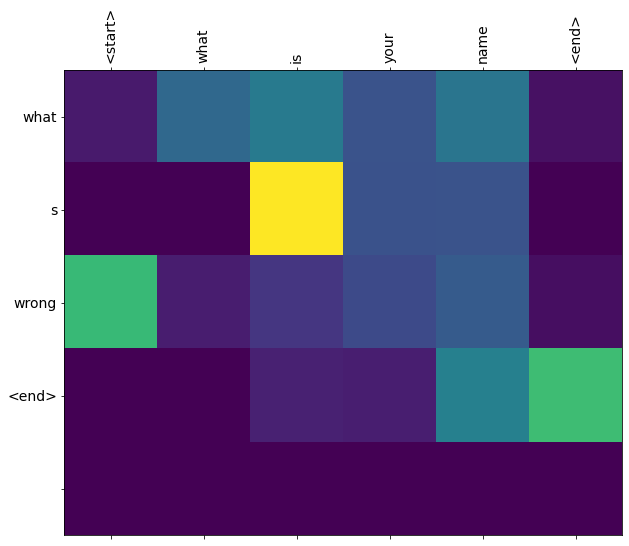

In [83]:
chat("what is your name")

i 
i m 
i m fine 
i m fine <end> 
Input: <start> how are you <end>
Predicted translation: i m fine <end> 


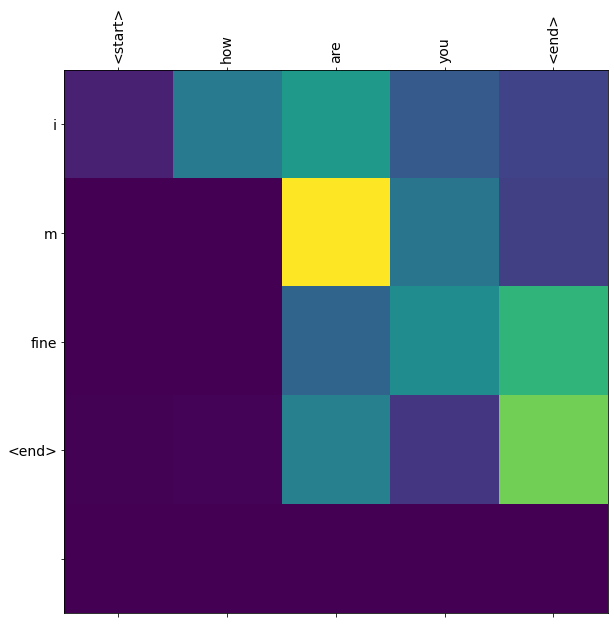

In [84]:
chat("how are you")

oh 
oh mike 
oh mike <end> 
Input: <start> how was your trip <end>
Predicted translation: oh mike <end> 


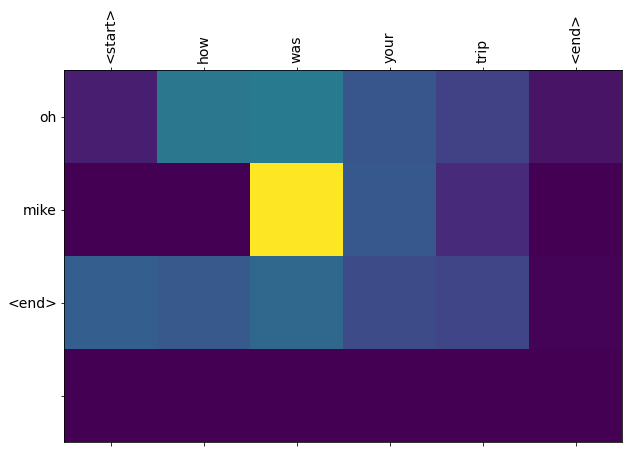

In [85]:
chat("how was your trip")

i 
i m 
i m sorry 
i m sorry <end> 
Input: <start> lets play football <end>
Predicted translation: i m sorry <end> 


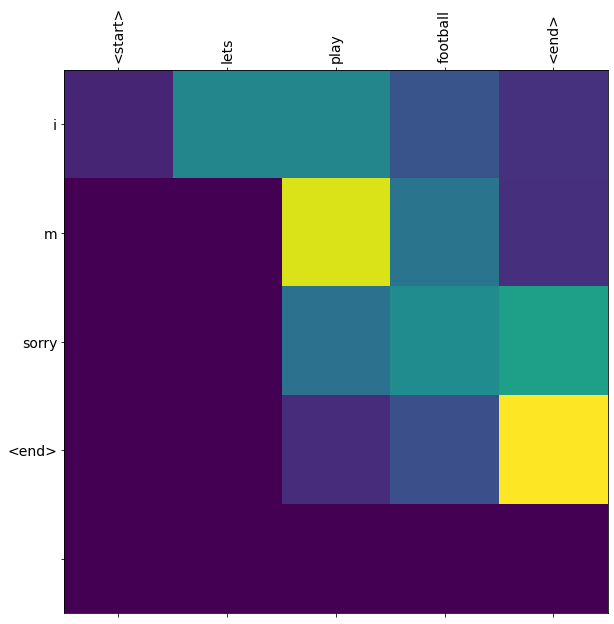

In [86]:
chat("lets play football")

i 
i m 
i m cathal 
i m cathal cheunt 
i m cathal cheunt <end> 
Input: <start> who are you <end>
Predicted translation: i m cathal cheunt <end> 


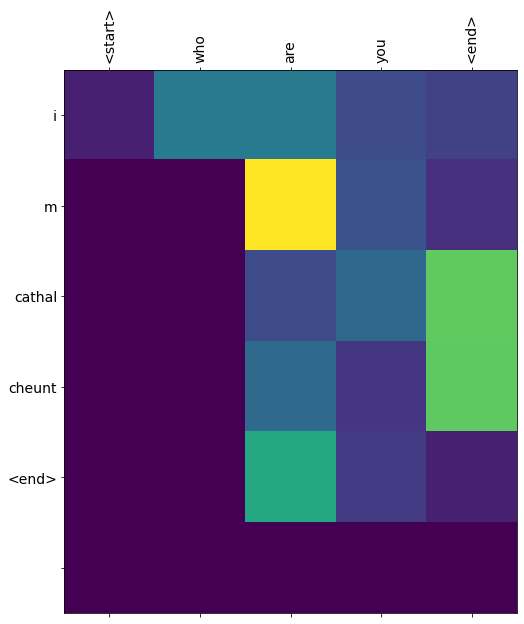

In [87]:
chat("who are you")

to 
to find 
to find my 
to find my feed 
to find my feed <end> 
Input: <start> where do you live <end>
Predicted translation: to find my feed <end> 


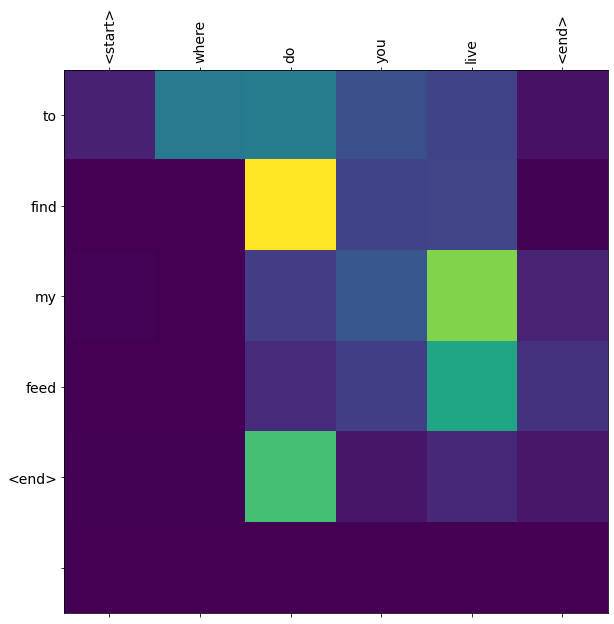

In [88]:
chat("where do you live")

i 
i m 
i m in 
i m in wichita 
i m in wichita <end> 
Input: <start> where are you <end>
Predicted translation: i m in wichita <end> 


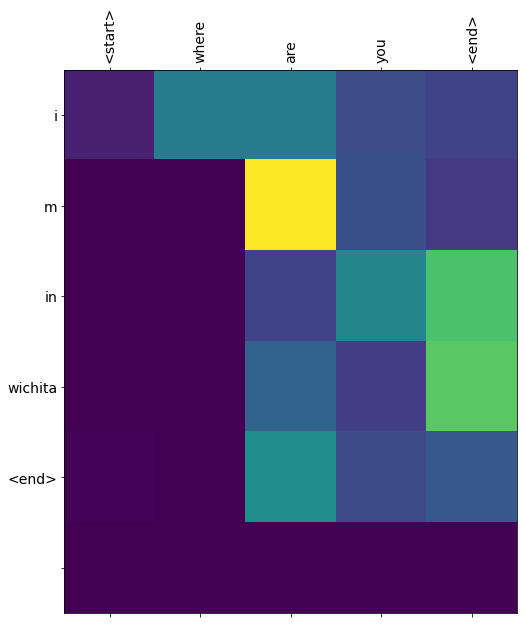

In [89]:
chat("where are you?")

In [90]:

checkpoint

In [91]:

latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'/content/drive/My Drive/coursera/training_checkpoints/ckpt-10'

In [92]:
!ls "/content/drive/My Drive/coursera/training_checkpoints"

checkpoint		     ckpt-5.data-00000-of-00001
ckpt-10.data-00000-of-00001  ckpt-5.index
ckpt-10.index		     ckpt-6.data-00000-of-00001
ckpt-1.data-00000-of-00001   ckpt-6.index
ckpt-1.index		     ckpt-7.data-00000-of-00001
ckpt-2.data-00000-of-00001   ckpt-7.index
ckpt-2.index		     ckpt-8.data-00000-of-00001
ckpt-3.data-00000-of-00001   ckpt-8.index
ckpt-3.index		     ckpt-9.data-00000-of-00001
ckpt-4.data-00000-of-00001   ckpt-9.index
ckpt-4.index


In [93]:
!pip install compress-pickle

In [94]:

fname3 = "/content/drive/My Drive/coursera/tokenizer"

In [95]:
!pip install compress-pickle

In [96]:
from compress_pickle import dump,load

In [97]:
dump(tokenizer, fname3, compression="lzma", set_default_extension=False)

In [102]:
tokenizer.word_index["hello"]

70

In [106]:
tokenizer.word_index['20']

598